<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Z_CovidDetection_1_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q keras

In [4]:
import keras

In [10]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [11]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [12]:
train = image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Train', 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Val', 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Test', 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)       

In [15]:
r = model.fit(
    train, 
    epochs=17,
    validation_data=validation,
    validation_steps=100,
)

Epoch 1/17
262/262 [==============================] - 1926s 7s/step - loss: 0.7034 - accuracy: 0.6832 - val_loss: 0.2096 - val_accuracy: 0.9700
Epoch 2/17
262/262 [==============================] - 135s 516ms/step - loss: 0.3927 - accuracy: 0.8233 - val_loss: 0.4202 - val_accuracy: 0.8800
Epoch 3/17
262/262 [==============================] - 135s 516ms/step - loss: 0.2952 - accuracy: 0.8822 - val_loss: 0.3588 - val_accuracy: 0.8900
Epoch 4/17
262/262 [==============================] - 135s 516ms/step - loss: 0.2455 - accuracy: 0.9074 - val_loss: 0.0876 - val_accuracy: 0.9800
Epoch 5/17
262/262 [==============================] - 135s 516ms/step - loss: 0.1917 - accuracy: 0.9266 - val_loss: 0.1887 - val_accuracy: 0.9500
Epoch 6/17
262/262 [==============================] - 135s 515ms/step - loss: 0.1648 - accuracy: 0.9371 - val_loss: 0.3903 - val_accuracy: 0.8300
Epoch 7/17
262/262 [==============================] - 136s 517ms/step - loss: 0.1599 - accuracy: 0.9397 - val_loss: 0.1894 - v

Text(0.5, 1.0, 'Accuracy Evolution')

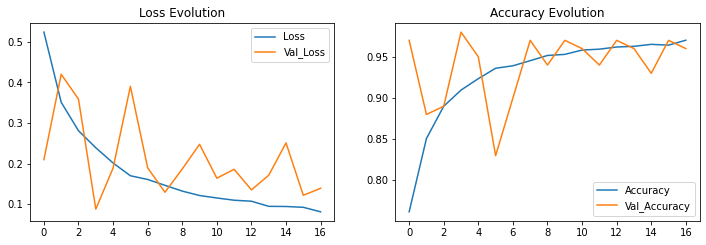

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [17]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 641s 230ms/step - loss: 0.2719 - accuracy: 0.9176
Test Accuracy: 91.76%
262/262 [==============================] - 131s 499ms/step - loss: 0.0571 - accuracy: 0.9786
Train Accuracy: 97.86%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

rounded_labels=np.argmax(test, axis=1)

predictions = model.predict(test)
pred = np.argmax(predictions, axis=1)


# target_names=['Covid','Normal','Pneumonia']
print(confusion_matrix(rounded_labels.classes, pred ))
pd.DataFrame(classification_report(rounded_labels.classes,pred,output_dict=True))